In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)


In [2]:
epoch = "19"

In [3]:
d_fn = "./../drawing/canvasses_epoch"+epoch+".npy"

def sigmoid(x):
    return 1/(1 +np.exp(-x))

drawings = np.load(d_fn)
drawings[-1, :, :] = sigmoid(drawings[-1, :, :])
#drawings = sigmoid(drawings)

In [4]:
drawings.shape

(8, 106, 16384)

In [5]:
drawings[-1, :, :].max()

0.995243

<IPython.core.display.Javascript object>


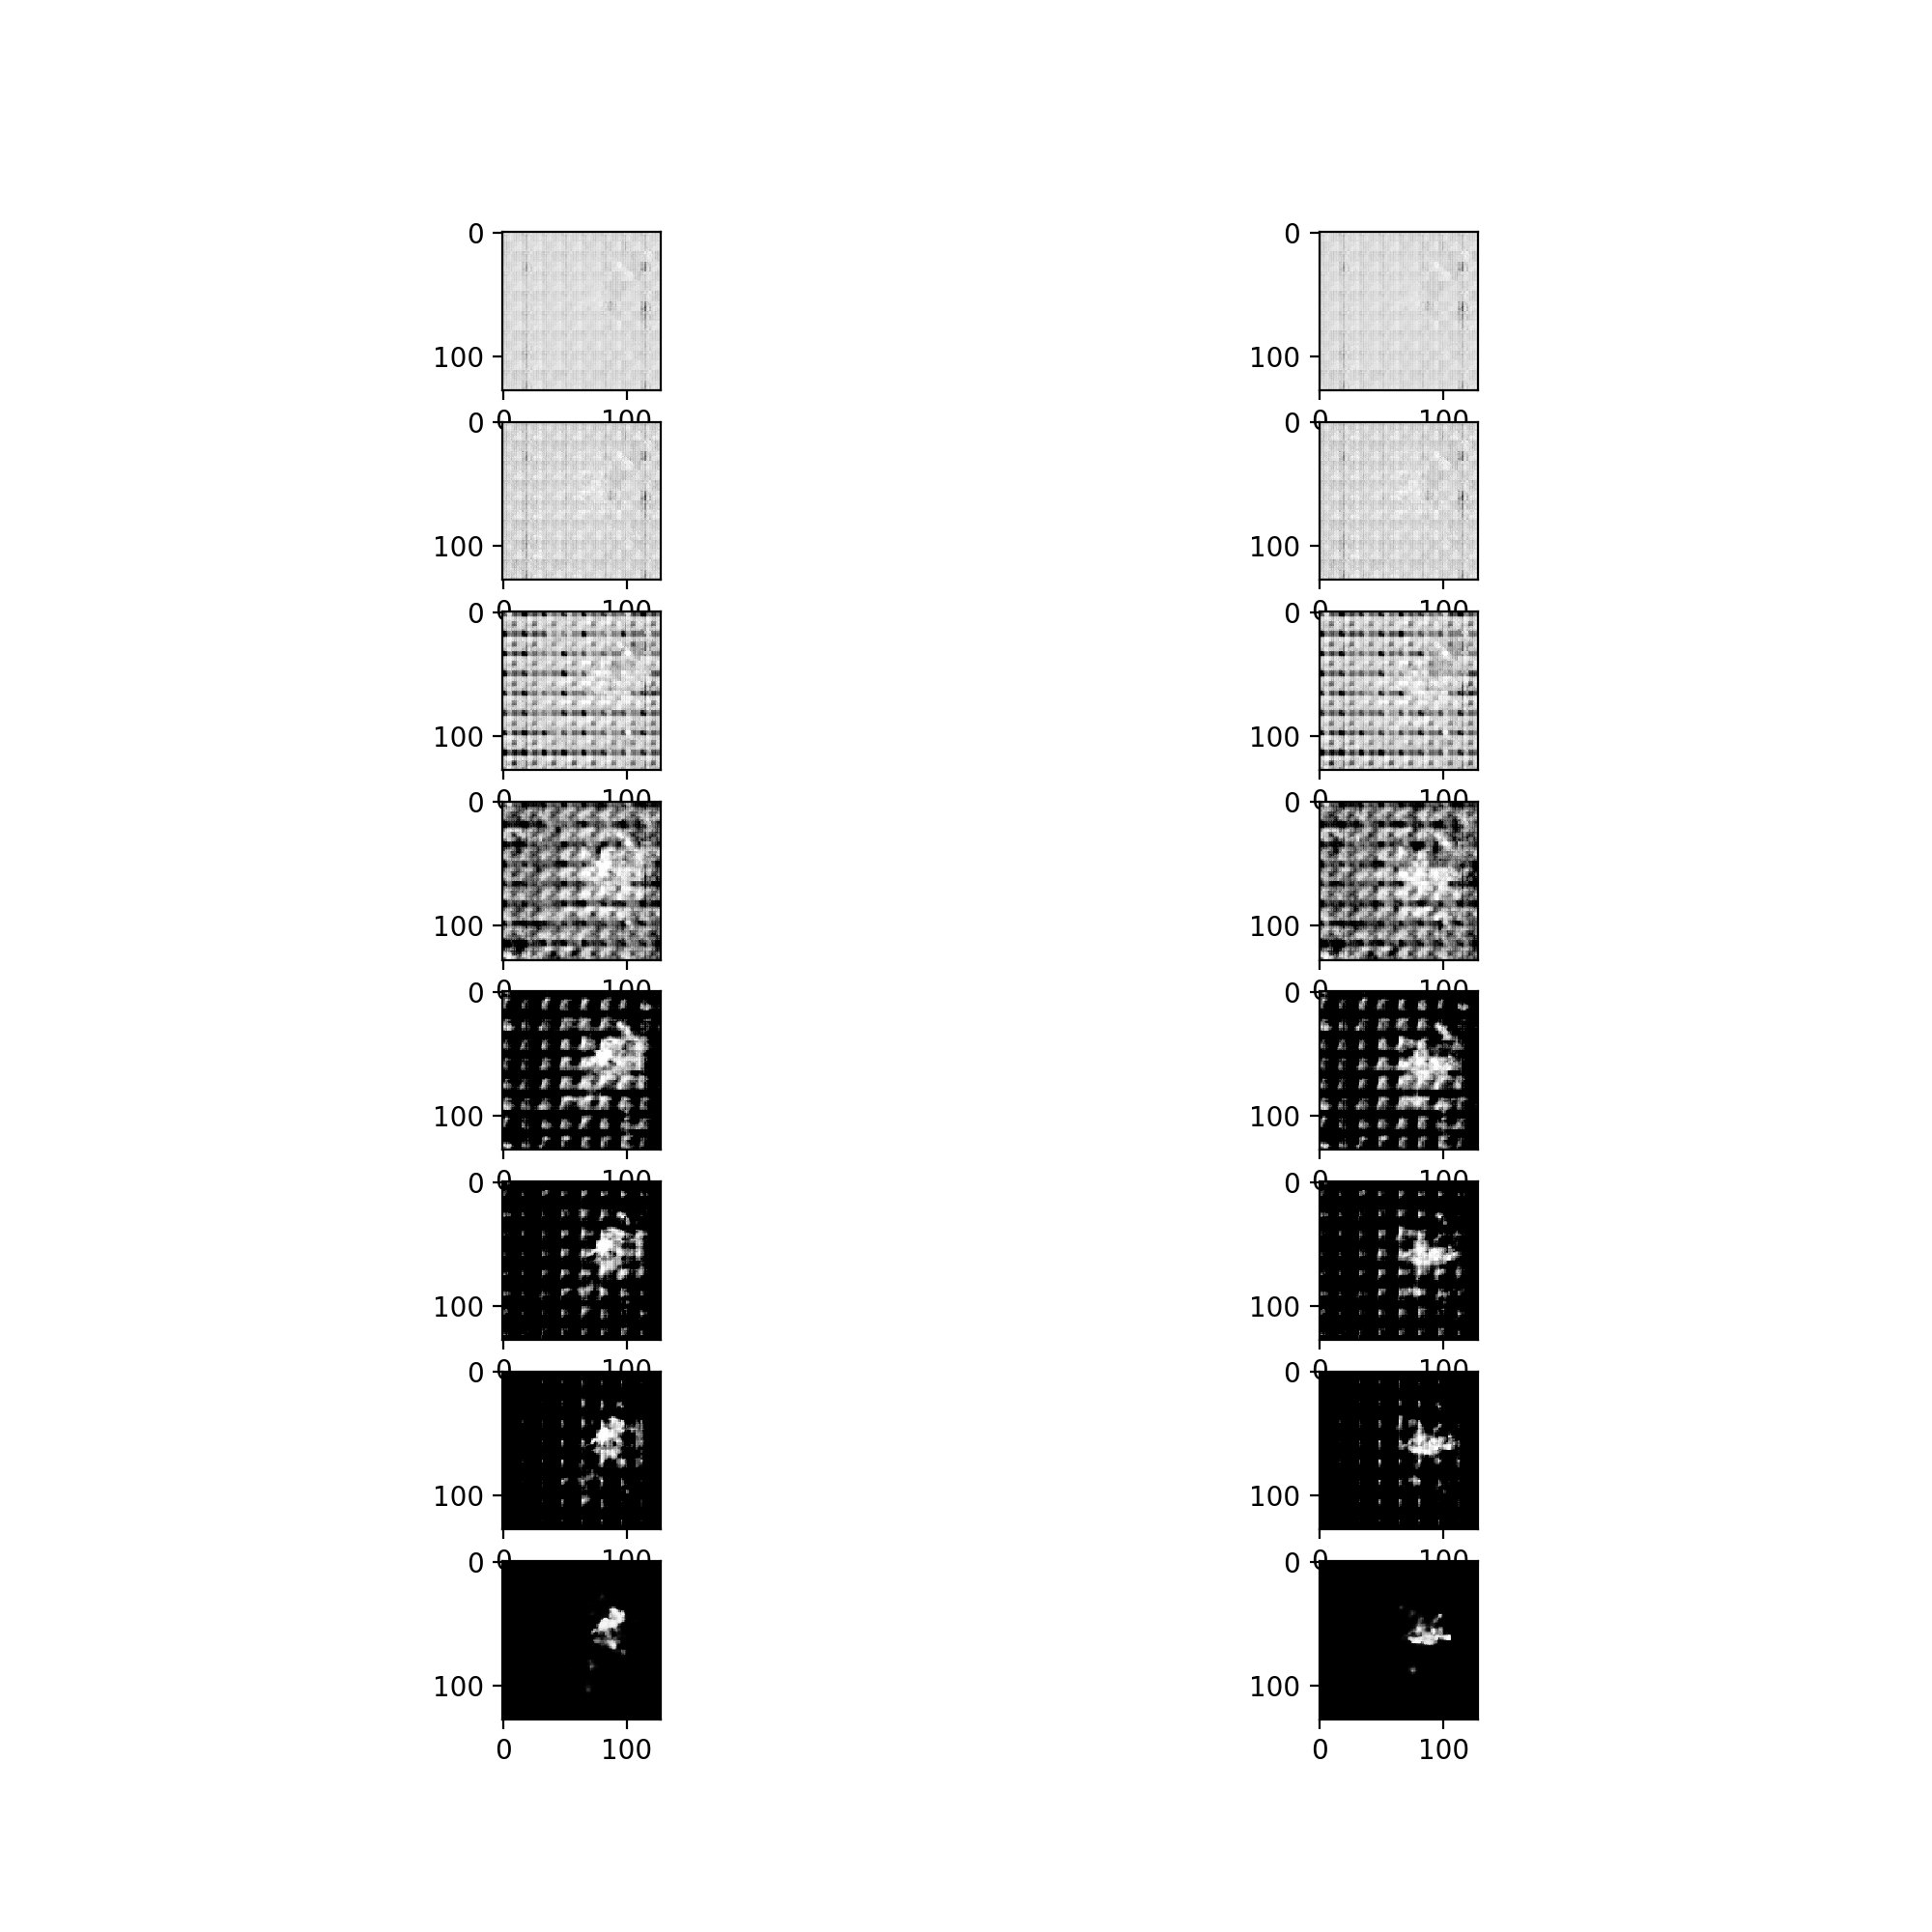

In [6]:
T = drawings.shape[0]
n_plots = 2
which = 9
ref = 23

vmax = 1#np.max(drawings[T-1][which])
vmin = -5 #np.min(drawings[T-1][which])

fig, ax = plt.subplots(nrows=T, ncols=n_plots, figsize=(10, 10) )

for t in range(T):
    ao = ax[t]
    w = which
    normal = drawings[t][w].reshape((128, 128)) #- drawings[0][w].reshape((128, 128))
    reference = drawings[t][ref].reshape((128, 128))

    if not t==(T-1):
        img_1 = ao[1].imshow(reference, vmin=vmin, vmax=vmax, cmap="Greys_r")
        img_0 = ao[0].imshow(normal, vmin=vmin, vmax=vmax, cmap="Greys_r")
    else:
        img_1 = ao[1].imshow(reference, cmap="Greys_r")
        img_0 = ao[0].imshow(normal, cmap="Greys_r")
        
    
    #print(t, np.max(normal), np.min(normal), np.average(normal), np.std(normal))


In [7]:
batch_size = drawings.shape[1]

finished = drawings[-1:,:,].reshape((batch_size, 128, 128))
reference = np.load("../drawing/references_epoch"+epoch+".npy").reshape((batch_size, 128, 128))
#reference[reference < 0.2] = 0

<IPython.core.display.Javascript object>


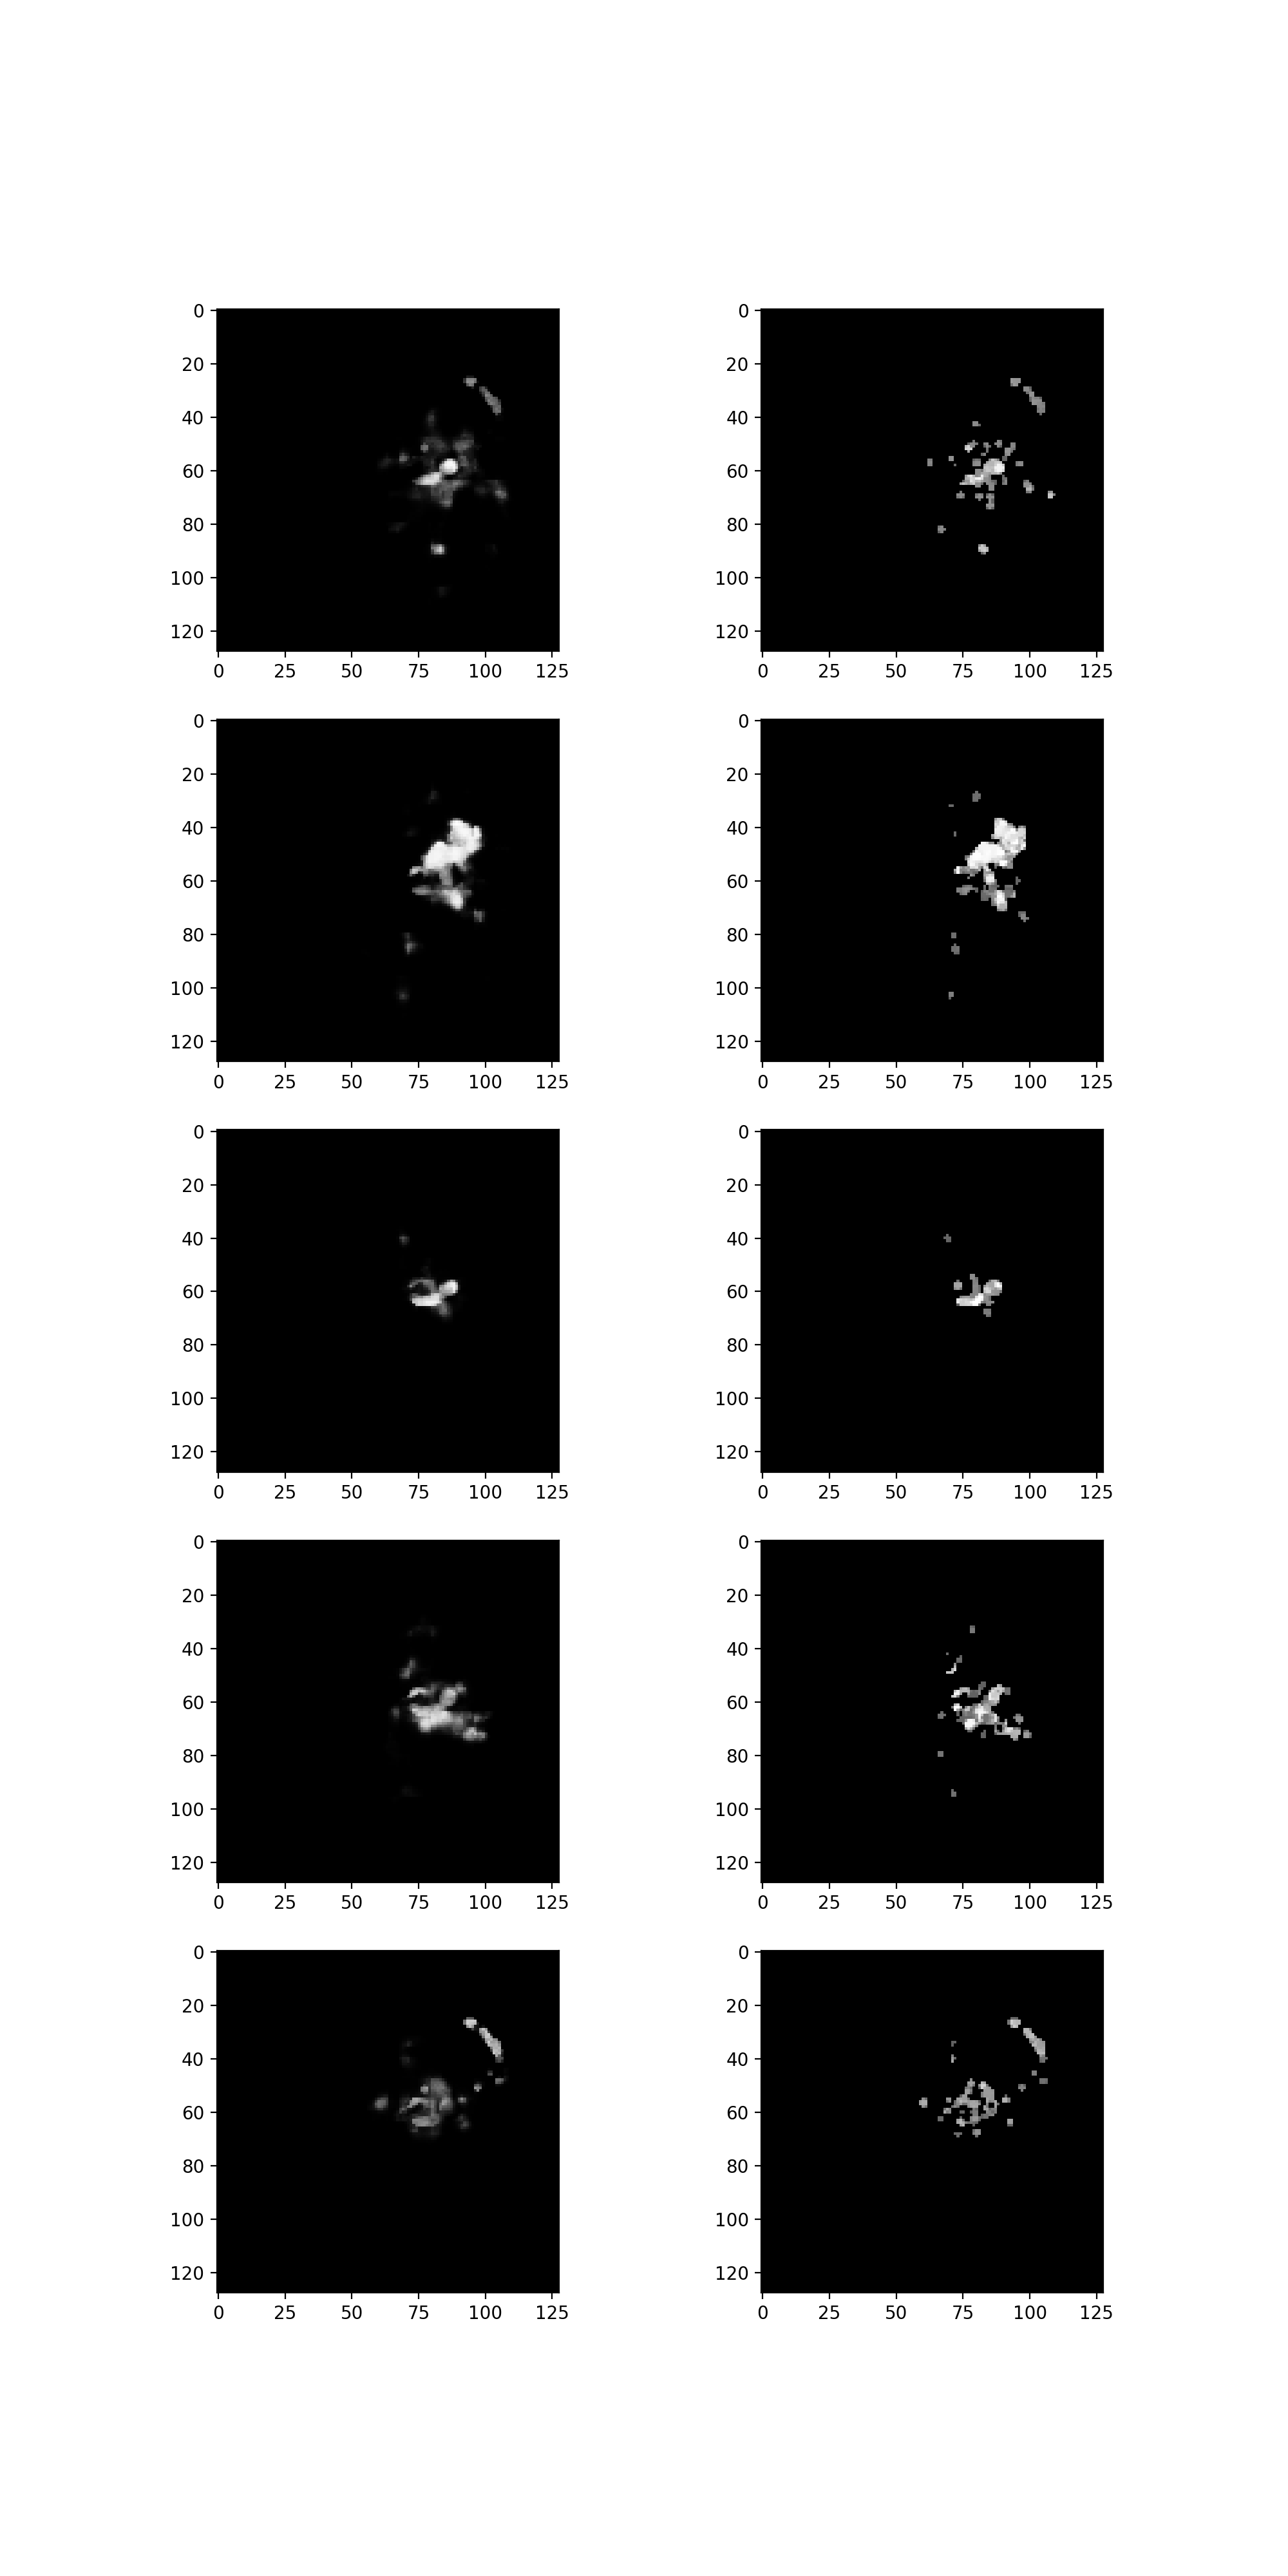

In [8]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

i = 1
which_to_show = [4+i, 8+i, 10+i, 23+i, 31+i]

for w, ax in zip(which_to_show, axs):
    ax[0].imshow(finished[w], vmin=0, vmax=1, cmap="Greys_r")
    ax[1].imshow(reference[w], vmin=0, vmax=1, cmap="Greys_r")

<IPython.core.display.Javascript object>


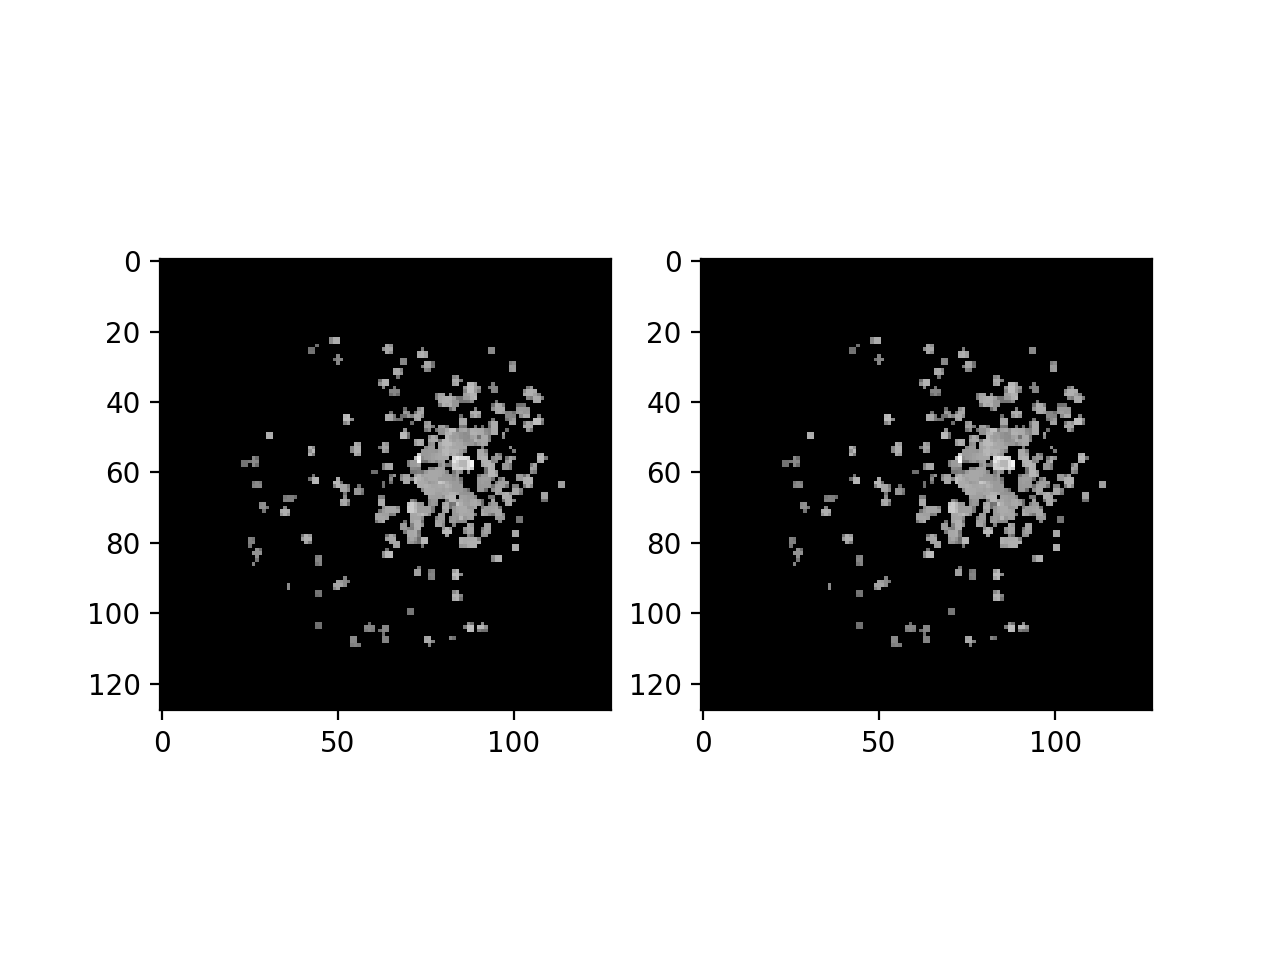

In [9]:
fig, ax = plt.subplots(ncols=2)
to_filter = reference[20].reshape((128, 128))
ax[0].imshow(to_filter, cmap="Greys_r")

filtered = to_filter.copy()
filtered[filtered < 0.3] = 0
ax[1].imshow(filtered, cmap="Greys_r")